Proyecto Final realizado para el Máster en Ciencia de Datos 2022/23 de la Universidad de Alicante.

Asignatura: Trabajo Fin del Máster

Autor: Kelly Turbay Eljach

# Introducción:

Este trabajo de investigación utilizará un conjunto de datos sobre la predicción de riesgo de diabetes en etapa temprana basado en factores de riesgo y condiciones físicas. El conjunto de datos fue obtenido de la página web del repositorio UCI Machine Learning, específicamente del siguiente enlace: https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset.

El objetivo será aplicar varios modelos de ensembles al conjunto de datos de riesgo de diabetes para desarrollar herramientas computacionales eficientes en la detección temprana del riesgo de diabetes, aprovechando el trabajo previo realizado por los autores del conjunto de datos. Los ensembles son una técnica utilizada en aprendizaje automático que combina múltiples modelos individuales para mejorar la precisión y el rendimiento de las predicciones. Para este proyecto, nos inspiramos en el código utilizado por Laura García y Diego Silveira, estudiantes del Máster de Ciencia de Datos en el curso 2021-2022, en su práctica 2 de Minería de Datos. Puedes encontrar el código en la siguiente URL: https://www.kaggle.com/code/diegosilveira/mineria-de-datos-practica-2

Se espera que este trabajo de investigación contribuya al campo de la detección y prevención temprana de la diabetes, al proporcionar herramientas efectivas basadas en algoritmos de ensembles. Estas herramientas podrían ser de gran utilidad en el ámbito de la salud pública, permitiendo identificar de manera precisa el riesgo de diabetes en función de los factores de riesgo y la condición física de las personas.

## Importación de librerías y datos
En este apartado se realiza la importación de las librerías necesarias para el pre-procesamiento, interpretación de resultados, análisis y visualización de los datos, así como la carga del dataset y el uso de diferentes técnicas de análisis como regresión, clasificación, ensembles y clustering.

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 86.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install scikit-learn==1.2.0
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 63.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
!pip install kaggle

In [ ]:
# Importación de librerías de Python que necesitaremos en este proyecto

from google.colab import files # trabajar con archivos en Google Colab
import pandas as pd

import time
import warnings
import io
import random

import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib as mpl
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pickle # Serializar datos
import sklearn

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer # Imputación con la librería sklearn
from sklearn.impute import KNNImputer # Imputación  de valores faltantes utilizando el algoritmo K-Nearest Neighbors (KNN)

from sklearn.model_selection import train_test_split # Libreria para realizar train test
from sklearn.linear_model import LogisticRegression,SGDClassifier # Import for LogisticRegression
from sklearn.model_selection import KFold # Import for apply crossvalidation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler # Import LabelEncoder y scaler

from sklearn.metrics import precision_score # Import para la métrica precission
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # R2, MAE y MSE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # Import para SVC
from sklearn.tree import DecisionTreeRegressor # Decision tree Regressor
from sklearn.neighbors import KNeighborsRegressor # Knn
from sklearn.svm import SVR # SVR
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import RobustScaler # Import scaler
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression # LinearRegression
#from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier # Import para DecissionTree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture


from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import plot_tree
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import StackingClassifier
from sklearn.utils.multiclass import unique_labels

from tqdm import tqdm
from itertools import cycle, islice
from scipy import stats
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from scipy.spatial.distance import squareform
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots
%matplotlib inline
from typing import Optional

np.random.seed(0)
pd.options.mode.chained_assignment = None  # Evitamos warnings indeseados

In [ ]:
# Cargamos el fichero CSV con los datos sobre crímenes en Los Ángeles
df = pd.read_csv("https://raw.githubusercontent.com/kellyturbay/TFM-Ensembles/main/diabetes_data_upload.csv",header=0)
df.head(5)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Para analizar datos, es necesario tener una idea general de las características de un conjunto de datos. Para ello, es útil utilizar diversas herramientas estadísticas que nos permitan conocer los datos a tratar y analizar los mismos. Con base en ello, iniciamos con observar un resumen del dataset seleccionado a través del método 'info' que nos permitirá tener un resumen del mismo.

In [ ]:
# Imprimimos información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

## Información sobre el dataset
Este conjunto de datos está compuesto por 519 filas con 17 columnas. Las columnas representan diferentes características y factores de riesgo relacionados con la diabetes, como la edad, el género, la poliuria, la polidipsia, la pérdida repentina de peso, la debilidad, la polifagia, el afta genital, el desenfoque visual, el picor, la irritabilidad, la cicatrización retardada, la paresia parcial, la rigidez muscular, la alopecia y la obesidad. La columna "class" indica si el individuo tiene o no diabetes.

Este conjunto de datos puede ser utilizado para desarrollar modelos de aprendizaje automático para predecir el riesgo de diabetes en etapa temprana en función de los factores de riesgo y las condiciones físicas mencionadas anteriormente.

A continuación, una breve descripción de las columnas presentes en el conjunto de datos de predicción de riesgo de diabetes en etapa temprana:

* Age: Edad de la persona (valor numérico en años).
* Gender: Género de la persona (valores categóricos: "Male" para masculino y "Female" para femenino).
* Polyuria: Presencia de poliuria (valores categóricos: "Yes" para sí y "No" para no).
* Polydipsia: Presencia de polidipsia (valores categóricos: "Yes" para sí y "No" para no).
* sudden weight loss: Pérdida repentina de peso (valores categóricos: "Yes" para sí y "No" para no).
* weakness: Presencia de debilidad (valores categóricos: "Yes" para sí y "No" para no).
* Polyphagia: Presencia de polifagia (valores categóricos: "Yes" para sí y "No" para no).
* Genital thrush: Presencia de afta genital (valores categóricos: "Yes" para sí y "No" para no).
* visual blurring: Presencia de desenfoque visual (valores categóricos: "Yes" para sí y "No" para no).
* Itching: Presencia de picor (valores categóricos: "Yes" para sí y "No" para no).
* Irritability: Presencia de irritabilidad (valores categóricos: "Yes" para sí y "No" para no).
* delayed healing: Cicatrización retardada (valores categóricos: "Yes" para sí y "No" para no).
* partial paresis: Presencia de paresia parcial (valores categóricos: "Yes" para sí y "No" para no).
* muscle stiffness: Presencia de rigidez muscular (valores categóricos: "Yes" para sí y "No" para no).
* Alopecia: Presencia de alopecia (valores categóricos: "Yes" para sí y "No" para no).
* Obesity: Presencia de obesidad (valores categóricos: "Yes" para sí y "No" para no).
* class: Indicador si el individuo tiene o no diabetes (valores categóricos: "Positive" indica que el individuo tiene diabetes y "Negative" indica que no la tiene).

# Limpieza y preparación de datos
En esta sección nos enfocaremos en la limpieza y transformación de los datos. Nuestro objetivo es verificar la presencia de datos duplicados o faltantes, y luego aplicar las transformaciones y filtros necesarios.

## Detección de datos duplicados

Comenzamos por analizar si hay duplicados en los datos, es decir, registros que sean idénticos en todas las columnas.

In [ ]:
# Comprobamos si existen filas enteras duplicadas
df.duplicated().sum()

269

In [ ]:
df[df.duplicated(keep=False)].head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
17,67,Male,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Positive
18,66,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,No,Positive
19,43,Male,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,Positive
20,62,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,Positive
21,54,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Positive


Después de realizar la verificación, hemos identificado un total de 269 filas duplicadas en el conjunto de datos.

Estas filas duplicadas corresponden a registros repetidos de individuos. La razón de los datos duplicados podría deberse a errores en la recopilación de datos, ingreso de datos repetidos o cualquier otro problema durante la recolección y almacenamiento de los datos.

Con la finalidad de asegurar la calidad y consistencia de los datos, se eliminará las filas duplicadas, ya que no aportan información adicional y podrían afectar el análisis posterior y los resultados obtenidos.

In [ ]:
# Eliminamos las filas enteras duplicadas
df.drop_duplicates()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


## Valores ausentes

Ahora verificamos la presencia de valores faltantes en las diversas columnas del conjunto de datos y procederemos a corregirlos en los casos necesarios.

In [ ]:
# Obtenemos el número de valores NA en cada columna
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

No se observan valores nulos en ninguna de las características del dataset.

## Transformaciones
En esta sección, realizaremos la transformación de los datos para asegurarnos de que estén en sus tipos correctos. Se visualizará los tipos de datos actuales para identificar las columnas que requieren corrección.

In [ ]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

No es necesario realizar transformaciones, ya que los tipos de datos de cada columna están correctos.

## Valores anómalos
En esta sección, validaremos la existencia de datos anómalos o incorrectos de nuestro conjunto de datos. Para lograrlo, realizaremos algunas verificaciones.

Para comenzar, imprimiremos los valores de la columna edad de los participantes para identificar posibles valores anómalos, como aquellos que se hayan registrado como 0 o -1.

In [ ]:
df['Age'].value_counts()

35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
45    18
58    18
50    18
54    16
39    16
57    15
60    15
68    10
28     9
42     9
72     9
66     9
36     8
61     8
56     8
46     8
67     8
62     7
37     7
49     7
44     7
27     6
34     6
65     6
32     5
69     5
51     5
70     5
64     5
33     4
59     4
41     4
52     4
63     3
31     3
90     2
85     2
25     2
79     1
16     1
29     1
26     1
Name: Age, dtype: int64

Generamos un histograma por cada variable a fin de identificar la existencia de datos anómalos.

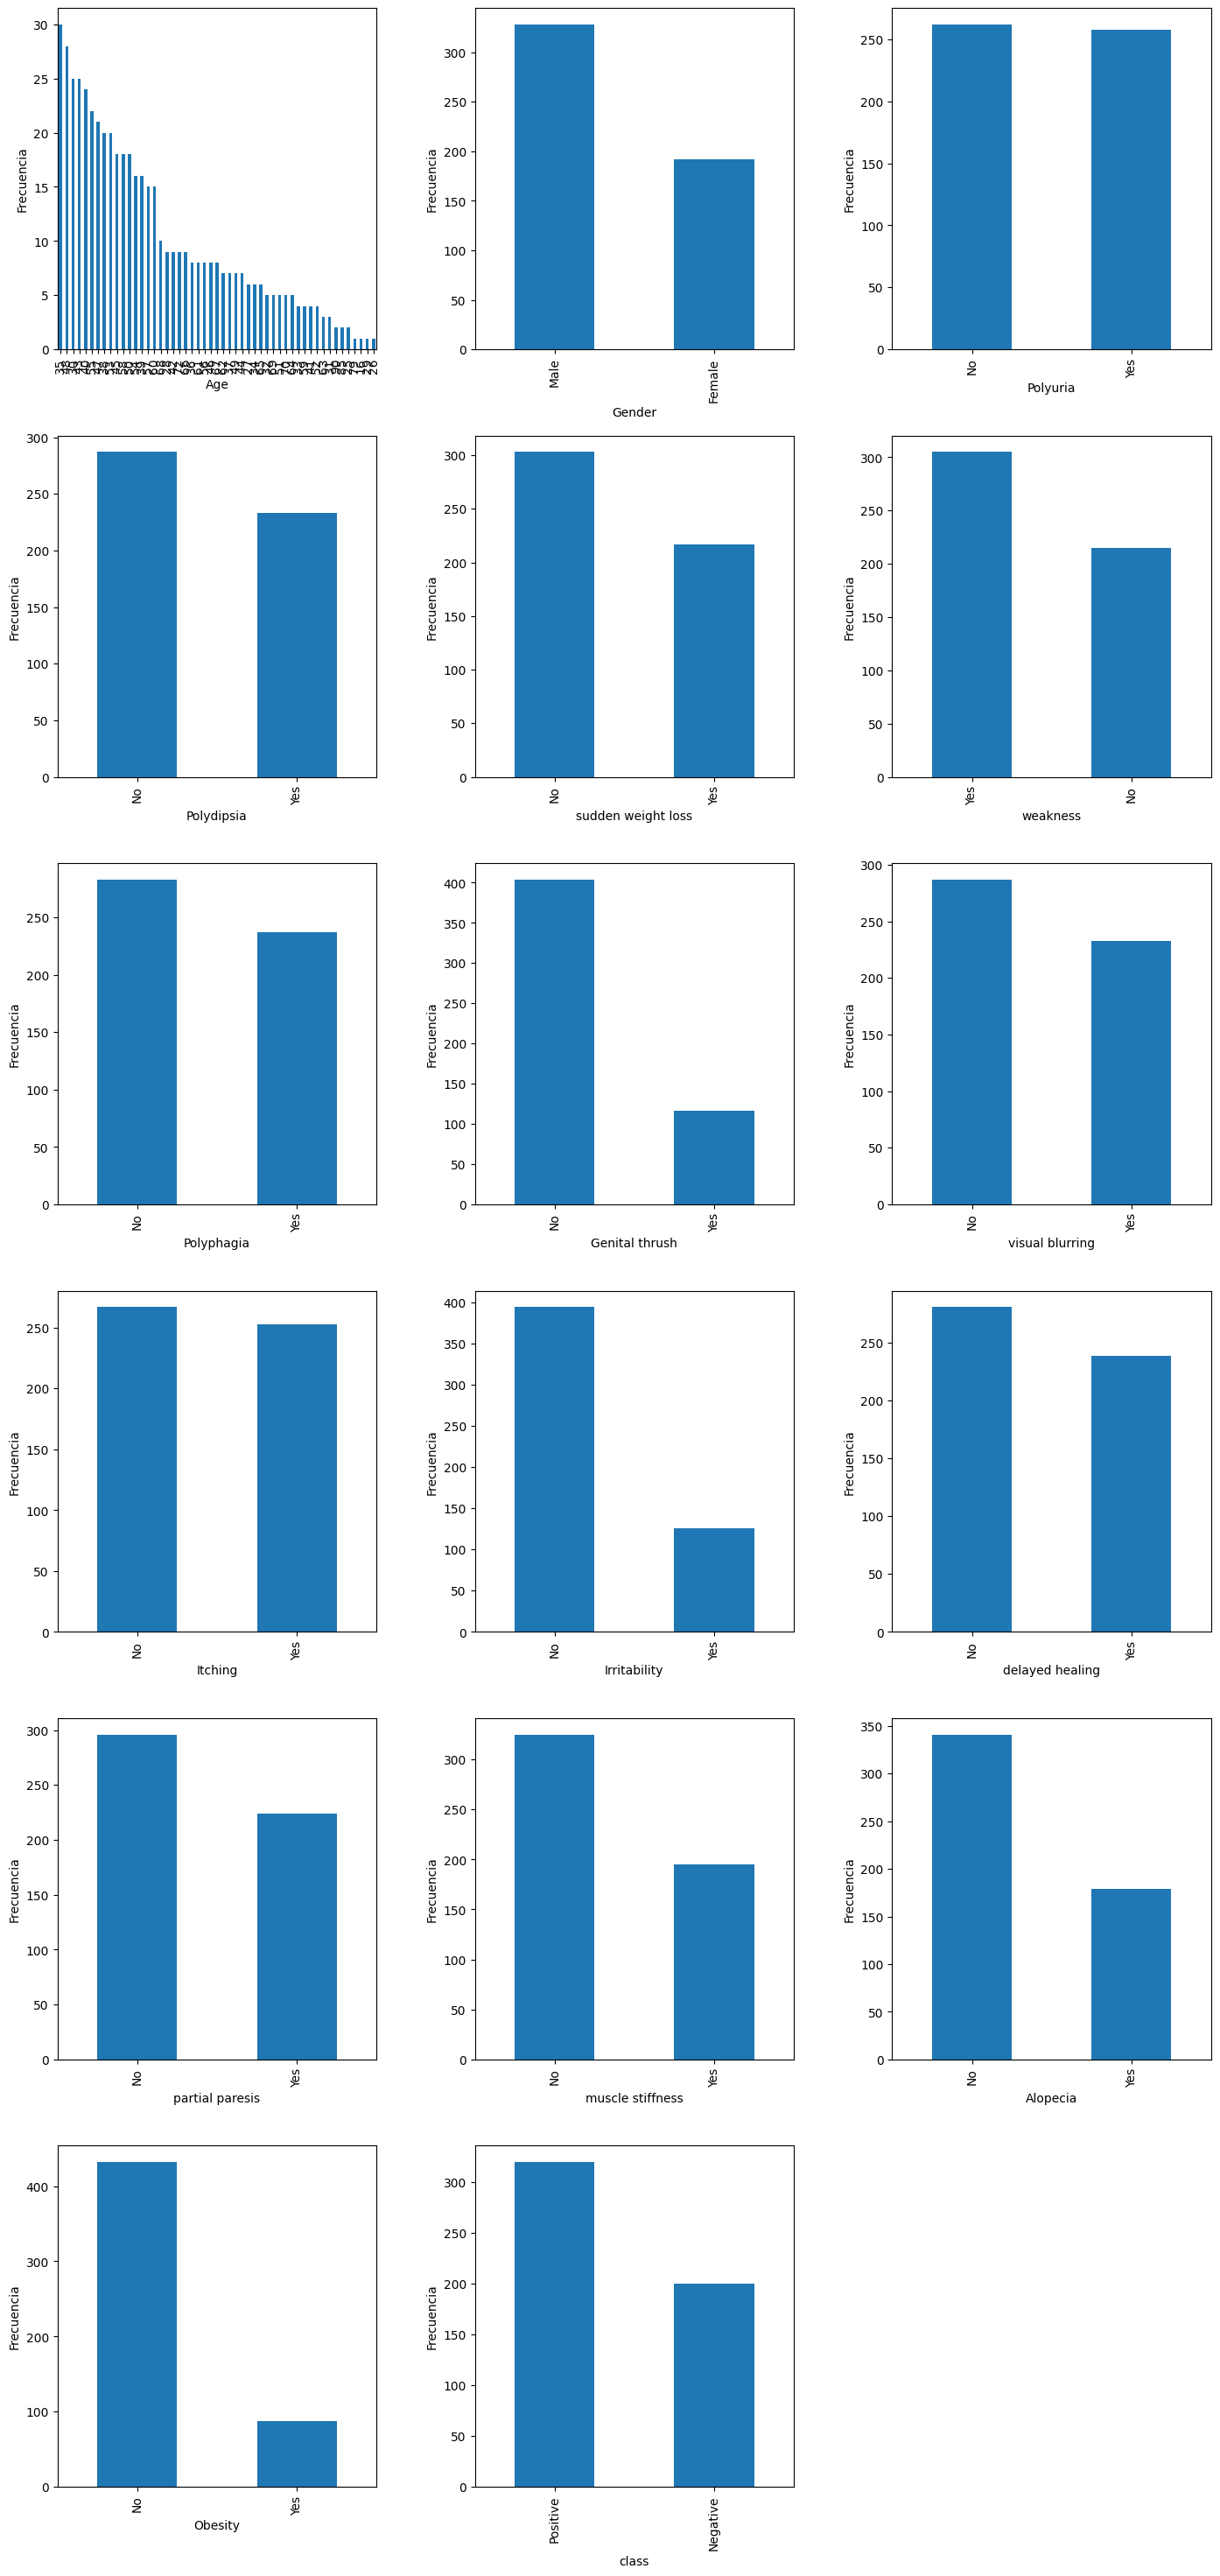

In [ ]:
data = pd.DataFrame(df)

# Obtiene las columnas categóricas
categorical_columns = data.select_dtypes(include=['int64','object']).columns


# Calcula el número de filas necesarias
num_rows = (len(categorical_columns) + 2) // 3  # 2 para los títulos y el espaciado

# Genera los gráficos en varias líneas
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
fig.tight_layout(pad=5.0)

for i, column in enumerate(categorical_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    data[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Ajusta los gráficos adicionales si el número de columnas no es múltiplo de 3
if len(categorical_columns) % 3 != 0:
    for i in range(len(categorical_columns) % 3, 3):
        fig.delaxes(axes[num_rows-1, i])

plt.show()


No se observaron datos anómalos en el dataset de niveles de obesidad.

In [ ]:
print(f'El conjunto de datos consta de {df.shape[0]} filas y {df.shape[1]} columnas')

El conjunto de datos consta de 520 filas y 17 columnas


## Filtros

En esta sección, nos enfocaremos en fusionar variables existentes para crear nuevas características y eliminar aquellas que no sean relevantes o necesarias para nuestro análisis. Iniciamos con la edad de la población obtenida en el dataset.

### Edad

In [ ]:
# Edad de los pacientes
df['Age'].value_counts()

35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
45    18
58    18
50    18
54    16
39    16
57    15
60    15
68    10
28     9
42     9
72     9
66     9
36     8
61     8
56     8
46     8
67     8
62     7
37     7
49     7
44     7
27     6
34     6
65     6
32     5
69     5
51     5
70     5
64     5
33     4
59     4
41     4
52     4
63     3
31     3
90     2
85     2
25     2
79     1
16     1
29     1
26     1
Name: Age, dtype: int64

Basado en los valores obtenidos, se evidencian edades minoritarias dentro del conjunto de datos. No obstante, se optará por no descartar estas edades.

### Gender: Género

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

### Polyuria: Presencia de micción excesiva (orina)

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Polyuria'].value_counts()

No     262
Yes    258
Name: Polyuria, dtype: int64

### Polydipsia: Sed excesiva

Solo tiene 2 clases por lo cual se mantiene los datos

In [ ]:
df['Polydipsia'].value_counts()

No     287
Yes    233
Name: Polydipsia, dtype: int64

### sudden weight loss: Pérdida repentina de peso

Solo tiene 2 clases por lo cual se mantiene los datos

In [ ]:
df['sudden weight loss'].value_counts()

No     303
Yes    217
Name: sudden weight loss, dtype: int64

### weakness: Debilidad

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['weakness'].value_counts()

Yes    305
No     215
Name: weakness, dtype: int64

### Polyphagia: Aumento anormal del apetito

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Polyphagia'].value_counts()

No     283
Yes    237
Name: Polyphagia, dtype: int64

### Genital thrush: Candidiasis genital infección causada por el crecimiento excesivo del hongo

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Genital thrush'].value_counts()

No     404
Yes    116
Name: Genital thrush, dtype: int64

### visual blurring: 8.	Visión borrosa
Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['visual blurring'].value_counts()

No     287
Yes    233
Name: visual blurring, dtype: int64

### Itching: Prurito o picazón en la piel

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Itching'].value_counts()

No     267
Yes    253
Name: Itching, dtype: int64

### Irritability: Cambios de humor y comportamiento irritables

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Irritability'].value_counts()

No     394
Yes    126
Name: Irritability, dtype: int64

### delayed healing: Demora en la cicatrización de heridas

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['delayed healing'].value_counts()

No     281
Yes    239
Name: delayed healing, dtype: int64

### heapartial paresis: Parálisis parcial en una parte del cuerpo

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['partial paresis'].value_counts()

No     296
Yes    224
Name: partial paresis, dtype: int64

### muscle stiffness: Rigidez muscular

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['muscle stiffness'].value_counts()

No     325
Yes    195
Name: muscle stiffness, dtype: int64

### Alopecia: Alopecia o pérdida de cabello en ciertas áreas del cuerpo

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Alopecia'].value_counts()

No     341
Yes    179
Name: Alopecia, dtype: int64

### Obesity: Obesidad

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Obesity'].value_counts()

No     432
Yes     88
Name: Obesity, dtype: int64

### class: Clase o etiqueta de cada muestra en relación con la presencia o ausencia de diabetes

Se observa desbalanceados por lo cual se mantiene todas las filas y se balanceará los datos en una sección posterior.

In [ ]:
# Niveles de obesidad
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

# Imputación

Dado que el conjunto de datos no contiene valores nulos o faltantes, no es necesario realizar ningún proceso de imputación.

In [ ]:
# Verificar si hay valores nulos o faltantes en el DataFrame
df.isnull().values.any()

False

# Selección y extracción de características
En esta sección nos enfocaremos en seleccionar y extraer características relevantes de nuestro conjunto de datos. Utilizaremos diversos métodos de selección para identificar aquellas características que sean más útiles para nuestros propósitos. No se realizará la validación mediante **selección de valores ausentes**, ya que el conjunto de datos no contiene registros nulos.

## Selección por varianza
Comenzaremos aplicando el método de selección por varianza a las columnas numéricas. Nuestro objetivo es analizar si la varianza de estas columnas es menor a 1, lo cual nos indicaría que presentan poca variabilidad en sus valores.

In [ ]:
# Obtenemos las columnas numéricas
df_num = df.select_dtypes(exclude=['object'])

# Declaramos el selector que obtendrá las columnas con una varianza menor de 1
selector = VarianceThreshold(threshold=1)

# Analizamos las varianzas del DataFrame
selector.fit(df_num)

# Obtenemos las columnas seleccionadas
mask = selector.get_support()

# Imprimos las columnas cuya varianza era menor de 1
print(df_num.loc[:,~mask].columns.values)

[]


Se observa que no hay columnas con poca varianza.

## Extracción manual de características
Acorde con los resultados anteriores, se procederá a unir variables o eliminar variables.

En la sección anterior, se ha decidido eliminar las columnas género (Gender) (género), cambios de humor y comportamiento irritables (Irritability), rigidez muscular (muscle stiffness) y alopecia (Alopecia) dado a que estas variables no son síntomas específicos de la diabetes y pueden estar asociada con otros problemas de salud.

In [ ]:
df.drop(['Gender', 'Irritability','muscle stiffness','Alopecia'], axis=1, inplace=True)
df1 = df
print(f'El conjunto de datos consta de {df.shape[0]} filas y {df.shape[1]} columnas')

El conjunto de datos consta de 520 filas y 13 columnas


A continuación, se presentan las características seleccionadas y modificadas en comparación con los datos iniciales:

1. `Age`: Edad de la persona.
2. `Polyuria`: Presencia de micción excesiva (orina).
3. `Polydipsia`: Presencia de sed excesiva.
4. `sudden weight loss`: Pérdida repentina de peso.
5. `weakness`: Sensación general de debilidad.
6. `Polyphagia`: Aumento anormal del apetito.
7. `Genital thrush`: Candidiasis genital.
8. `visual blurring`: Visión borrosa.
9. `Itching`: Presencia de picazón en la piel.
10. `delayed healing`: Cicatrización retardada de heridas.
11. `partial paresis`: Paresia parcial.
12. `Obesity`: Obesidad.
13. `class`: Clase de presencia o ausencia de diabetes.

Después de aplicar las transformaciones, filtrar los datos y selección de características, hemos obtenido un conjunto de datos que resume alrededor de 510 registros en 13 columnas.

Como resultado de los pasos anteriores, ahora disponemos de un conjunto de datos preprocesado y limpio, sin valores faltantes, que contiene las columnas necesarias para llevar a cabo tareas de ensembles.

### Balanceo de datos

Se valida si la clase o etiqueta de la variable respuesta se encuentra balanceada.

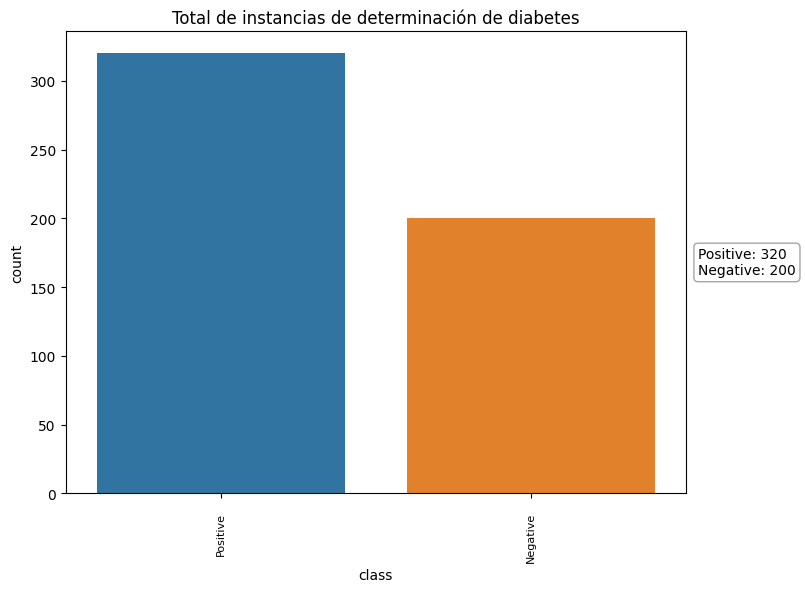

Número de instancias por clase:
Positive    320
Negative    200
Name: class, dtype: int64


In [ ]:
# Creación de una copia del dataframe balanceado para no afectar a los datos originales y así evitar posibles errores
data = df.copy()

# Gráfico con el total de instancias de cada nivel de obesidad
plt.figure(figsize=(8, 6))  # Tamaño de la figura
ax = sns.countplot(data=df, x='class')
plt.title("Total de instancias de determinación de diabetes")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=8)  # Aumenta el ángulo y el tamaño de la fuente
ax.tick_params(axis='x', pad=10)  # Ajusta el espacio entre las leyendas y el eje x

# Obtener el número de instancias por clase
value_counts = df['class'].value_counts()

# Agregar el cuadro de texto al lado del gráfico
textbox_text = '\n'.join(f"{label}: {count}" for label, count in value_counts.items())
props = dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7)
plt.text(1.02, 0.5, textbox_text, transform=ax.transAxes, bbox=props, verticalalignment='center')

plt.show()
print('Número de instancias por clase:')
print(df['class'].value_counts())


Se observa desbalanceo en la clase, class por lo cual, se procede a balancear los datos con la técnica SMOTE.

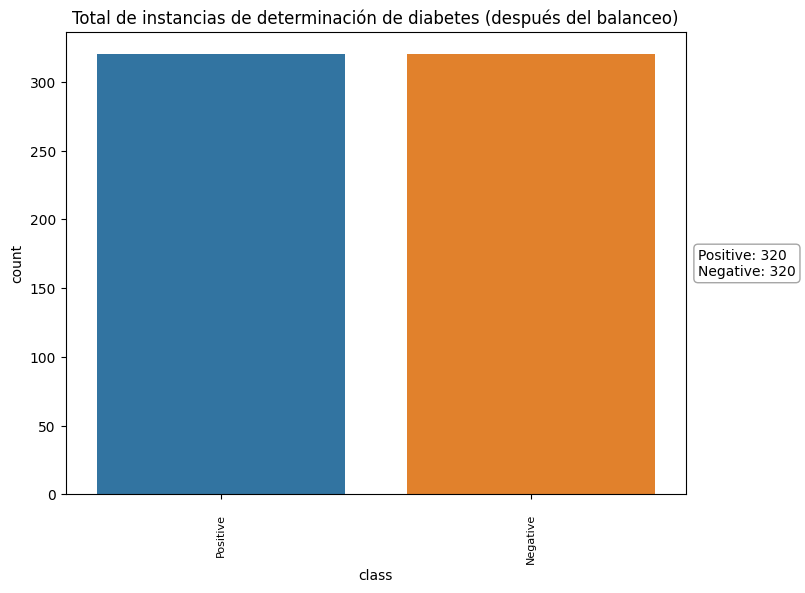

Número de instancias por clase después del balanceo:
Positive    320
Negative    320
Name: class, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Creación de una copia del dataframe balanceado para no afectar a los datos originales y así evitar posibles errores
data = df.copy()

# Convertir variables categóricas en variables dummy
categorical_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
                       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
                       'delayed healing', 'partial paresis', 'Obesity']
data = pd.get_dummies(data, columns=categorical_columns)

# Separar las variables predictoras (X) y la variable objetivo (y)
X = data.drop('class', axis=1)
y = data['class']

# Aplicar SMOTE para generar muestras sintéticas de la clase minoritaria
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo dataframe con los datos balanceados
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Verificar el balanceo de clases después de aplicar SMOTE
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=balanced_data, x='class')
plt.title("Total de instancias de determinación de diabetes (después del balanceo)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=8)
ax.tick_params(axis='x', pad=10)
textbox_text = '\n'.join(f"{label}: {count}" for label, count in balanced_data['class'].value_counts().items())
props = dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7)
plt.text(1.02, 0.5, textbox_text, transform=ax.transAxes, bbox=props, verticalalignment='center')
plt.show()

print('Número de instancias por clase después del balanceo:')
print(balanced_data['class'].value_counts())


Los datos se encuentran balanceados. Ahora seleccionaremos los datos.

### Selección y preparación de los de datos

Para aplicar esta técnica, seleccionaremos todas las columnas como variables de entrada, y a "class" como variable de salida.

Una vez tenemos el conjunto de datos que vamos a utilizar, realizamos un split, donde utilicemos el 70% de los datos para el train y el 30% de los datos.

In [ ]:
# Seleccionamos todas las columnas menos aquella que queremos predecir
data = balanced_data
x = data.iloc[:, :-1]
y = data['class']

# Iterar sobre las columnas y aplicar la transformación LabelEncoder
for col in x:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

# Convertimos las variables categóricas de 'y' en numéricas
le_descent = LabelEncoder()
y = le_descent.fit_transform(y)

# Convertimos 'y' en un array de numpy
y = np.array(y)

### Escalamiento de los datos

El escalamiento de los datos es una técnica común de preprocesamiento que se aplica a los datasets antes de aplicar técnicas de aprendizaje automático para garantizar que las variables tengan el mismo peso en los cálculos y para mejorar el rendimiento del modelo.

Para los fines de esta práctica, se utilizarán la clase StandardScaler para aplicar la técnica de ensembles.

In [ ]:
# Escalamos los datos de 'X'
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns = x.columns)

#### Train y Test

Una vez tenemos el conjunto de datos que vamos a utilizar, realizamos un split, donde utilicemos el 70% de los datos para el train y el 30% de los datos para el test. Para ello utiliza la función train_test_split de Sklearn.(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# summarize the shape of the train and test sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(448, 23) (192, 23) (448,) (192,)


In [ ]:
# Hacemos una copia de los datos ya preparados
x_copy_train = x_train.copy()
x_copy_test = x_test.copy()
y_copy_train = y_train.copy()
y_copy_test = y_test.copy()

# Visualizamos la información
x_train.head(5)

,Age,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,weakness_Yes,Polyphagia_No,...,visual blurring_No,visual blurring_Yes,Itching_No,Itching_Yes,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,Obesity_No,Obesity_Yes
566,-1.498626,0.859727,-0.840635,0.774597,-0.766870,0.754074,-0.736321,1.144757,-1.119608,0.868000,...,0.879121,-0.851509,1.012579,-0.972260,0.942287,-0.918902,0.790168,-0.754074,0.432879,-0.414923
68,-1.915164,0.859727,-0.840635,0.774597,-0.766870,0.754074,-0.736321,-0.873548,0.893170,-1.152073,...,-1.137500,1.174386,1.012579,-0.972260,0.942287,-0.918902,0.790168,-0.754074,0.432879,-0.414923
383,1.083910,-1.163160,1.189577,0.774597,-0.766870,0.754074,-0.736321,-0.873548,0.893170,-1.152073,...,-1.137500,1.174386,-0.987577,1.028532,-1.061247,1.088256,-1.265554,1.326130,0.432879,-0.414923
578,0.667372,0.859727,-0.840635,0.774597,-0.766870,-1.326130,-0.736321,-0.873548,-1.119608,-1.152073,...,-1.137500,1.174386,-0.987577,-0.972260,-1.061247,-0.918902,0.790168,-0.754074,0.432879,-0.414923
118,1.417141,-1.163160,1.189577,-1.290994,1.304002,0.754074,-0.736321,-0.873548,0.893170,0.868000,...,-1.137500,1.174386,-0.987577,1.028532,-1.061247,1.088256,-1.265554,1.326130,0.432879,-0.414923


### Funciones auxiliares
A continuación, se definen funciones necesarias que permitarán generar la matriz de confusión, curva ROC y cálculo de métricas.


In [ ]:
# Función auxiliar que evalúa los resultados de una clasificación
def evaluate_model(y_test, y_pred, n_classes):
  """
    Evalúa el modelo e imprime por pantalla las estadísitcas
  """
  print('==== Sumario de la clasificación ==== ')
  print(classification_report(y_test, y_pred))

  print('Accuracy -> {:.2%}\n'.format(accuracy_score(y_test, y_pred)))

  # Ploteamos la matriz de confusión
  display_labels = sorted(unique_labels(y_test, y_pred), reverse=True)
  cm = confusion_matrix(y_test, y_pred, labels=display_labels)

  z = cm[::-1]
  x = display_labels
  y =  x[::-1].copy()
  z_text = [[str(y) for y in x] for x in z]

  fig_cm = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

  fig_cm.update_layout(
      height=400, width=400,
      showlegend=True,
      margin={'t':150, 'l':0},
      title={'text' : 'Matriz de Confusión', 'x':0.5, 'xanchor': 'center'},
      xaxis = {'title_text':'Valor Real', 'tickangle':45, 'side':'top'},
      yaxis = {'title_text':'Valor Predicho', 'tickmode':'linear'},
  )
  fig_cm.show()

  # Ploteamos la curva ROC
  y_test_enc = label_binarize(y_test, classes=np.arange(n_classes))
  y_pred_enc = estimator[1].predict_proba(x_test)

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_enc[:, i], y_pred_enc[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  fpr["micro"], tpr["micro"], _ = roc_curve(y_test_enc.ravel(), y_pred_enc.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  plt.figure()
  plt.plot(
      fpr["micro"],
      tpr["micro"],
      label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
      color="deeppink",
      linestyle=":",
      linewidth=4,
  )

  plt.plot(
      fpr["macro"],
      tpr["macro"],
      label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
      color="navy",
      linestyle=":",
      linewidth=4,
  )

  colors = cycle(["aqua", "darkorange", "cornflowerblue","olive","orange","purple","fuchsia"])
  for i, color in zip(range(n_classes), colors):
      plt.plot(
          fpr[i],
          tpr[i],
          color=color,
          lw=lw,
          label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
      )

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Some extension of Receiver operating characteristic to multiclass")
  plt.legend(loc="lower right")
  plt.show()


print('Done!')

Done!


# Técnica de ensembles
En este apartado, analizaremos diferentes técnicas de combinación de ensembles. Los ensembles son una técnica de aprendizaje automático que se basa en combinar múltiples modelos individuales para lograr una predicción más precisa y robusta que la que se puede obtener de un solo modelo. Los modelos individuales en un ensemble pueden ser del mismo tipo o diferentes, y pueden ser entrenados en diferentes subconjuntos de los datos de entrenamiento. ¹

Para ello, emplearemos tres enfoques específicos: bagging, boosting y stacking. A continuación, explicaremos brevemente cada uno de ellos:

Bagging: Entrena varios modelos utilizando subconjuntos aleatorios del conjunto de datos de entrenamiento. Posteriormente, se combinan las predicciones de estos modelos mediante votación o promedio, lo que permite obtener un resultado final más preciso.¹

Boosting: Los modelos se entrenan secuencialmente, dándole mayor peso a los errores de las predicciones anteriores. De esta manera, el modelo se ajusta gradualmente para mejorar su rendimiento y capacidad de predicción.¹

Stacking: Se combina la salida de varios modelos en un conjunto de datos auxiliar. Luego, se entrena otro modelo utilizando estas predicciones como características para predecir la variable objetivo. La finalidad es aprovechar las fortalezas individuales de cada modelo y mejorar la precisión global de las predicciones.¹

En el conjunto de datos de detección de diabetes temprana, nos enfocaremos en la clasificación de la columna "class", que indica si una persona tiene o no diabetes. Los posibles valores para esta columna son Negative o Positive.


Referencia:
(1) 1.11. Ensemble methods — scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/ensemble.html.


Por lo anterior, procederemos a crear un modelo con cada uno de los técnicas de ensembles mencionados anteriormente y evaluaremos su rendimiento. Igual,definimos cuales modelos utilizaremos para evaluar el conjunto de datos de diabetes y consideraremos Bagging, Random Forest, AdaBoost, GradientBoost y Stacking como los modelos principales.

Finalmente, utilizaremos la técnica de GridSearchCV de scikit-learn que nos permite seleccionar los parámetros óptimos de cada modelo. Utilizando validación cruzada y una métrica específica, GridSearchCV determinará los mejores valores para cada parámetro.

In [ ]:
estim = [('knn', KNeighborsClassifier(n_neighbors=3)),
         ('cart', DecisionTreeClassifier(random_state=0)),
         ('svm', SVC(random_state=0)),
         ('lr', LogisticRegression(random_state=0))]

# Lista con los ensembles a evaluar.
ensembles = [
    BaggingClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    AdaBoostClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0),
    StackingClassifier(estimators=estim)
]

 Definimos los parámetros a utilizar para cada uno de los modelos e incluimos en una lista consolidada. Para ello, especificamos los diferentes conjuntos de parámetros para cada algoritmo, como Bagging, Random Forest, AdaBoost, GradientBoost y Stacking. En el conjunto de parámetros definimos una lista de valores posibles para diferentes hiperparámetros, como el número de estimadores, la profundidad máxima del árbol, la tasa de aprendizaje, entre otros.

 Agrupamos estos conjuntos de parámetros en una lista llamada 'parameters', que nos permitirá realizar la búsqueda de los mejores hiperparámetros para cada algoritmo mediante técnicas como GridSearchCV.

In [ ]:
bagging_parameters = {
    'estimator': [DecisionTreeClassifier(random_state=0), SVC(random_state=0), KNeighborsClassifier(n_neighbors=1),
                  SGDClassifier(max_iter=10000, tol=1e-3, random_state=0)],
    'n_estimators'  : [1, 5, 10, 20,50,100,200,300],
    'max_samples'   : [0.25, 0.5,0.6, 0.75, 1],
    'max_features'  : [0.25, 0.5, 0.75,0.8, 1]
}

randomforest_parameters = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth'   : [None, 1, 2, 5,7,15],
    'max_features':  ['auto', 'log2'],
    'max_samples' : [None, 0.25, 0.5, 0.75, 1 ]
}

adaboost_parameters = {
    'estimator'      : [DecisionTreeClassifier(random_state=0), SVC(random_state=0), KNeighborsClassifier(n_neighbors=1), SGDClassifier(max_iter=10000, tol=1e-3, random_state=0)],
    'n_estimators' : [1, 5, 10, 20,50, 100, 200,300],
    'learning_rate'  : [0.25, 0.1, 0.5, 1, 5]
}

gradientboost_parameters = {
    'learning_rate'  : [0.25, 0.5, 1, 5],
    'n_estimators' : [1, 5, 10, 20,50,100,200,300],
    'max_depth'      : [None, 1, 2, 5,7,10,15],
}

stacking_parameters = {
    'final_estimator' : [LogisticRegression(random_state=0), GradientBoostingClassifier(random_state=0)]
}

parameters = [
    bagging_parameters,
    randomforest_parameters,
    adaboost_parameters,
    gradientboost_parameters,
    stacking_parameters
]

A continuación, buscamos optimizar el desempeño de cada modelo y obtener la configuración óptima para cada algoritmo. En las listas 'estimators', 'accuracies' y 'times' l se almacenaa información de los modelos ajustados que nos permitirá analizar la precisión de cada uno y comparar los tiempos de ejecución.

Para ello, definimos una lista vacía llamada 'estimators' para almacenar los modelos ajustados, otra lista llamada 'accuracies' para almacenar las precisiones obtenidas por cada modelo y una tercera lista llamada 'times' para almacenar los tiempos de ejecución.

Iteramos sobre cada modelo para realizar una búsqueda exhaustiva de los mejores parámetros utilizando GridSearchCV. Utilizamos la métrica de precisión ('accuracy') como medida de evaluación y realizamos una validación cruzada con 10 folds.

Luego, se imprimen los mejores parámetros encontrados, la precisión obtenida en los datos de prueba y el tiempo de ajuste y entrenamiento. Se almacenan la precisión y el tiempo en las listas correspondientes. Se agrega una tupla que contiene el nombre del modelo de ensamble y el objeto clf (modelo ajustado) a la lista 'estimators', lo que permite acceder a los modelos ajustados posteriormente.



In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
estimators = [] # Para almacenar los modelos
accuracies = [] # Para almacenar su precisión
times = [] # Para almacenar el tiempo

# Iteramos para cada uno de los modelos de ensembles
for i, ensemble in enumerate(ensembles):
    start_time = time.time()

    clf = GridSearchCV(ensemble,          # Modelo
              param_grid = parameters[i], # Parámetro
              scoring='accuracy',         # Métrica de evaluación
              cv=10)                      # Número de folds para el CV
    print('************', ensemble.__class__.__name__, '************')
    clf.fit(x_train, y_train)
    print("Parámetros :", clf.best_params_)
    acc = (clf.predict(x_test) == y_test).mean()*100
    print("Accuracy :", (acc))
    sec = (time.time() - start_time)
    print("Time of tunning and training :", (sec))
    accuracies.append((ensemble.__class__.__name__, acc))
    times.append((ensemble.__class__.__name__, sec))
    estimators.append((ensemble.__class__.__name__, clf))

************ BaggingClassifier ************
Parámetros : {'estimator': KNeighborsClassifier(n_neighbors=1), 'max_features': 0.8, 'max_samples': 0.75, 'n_estimators': 200}
Accuracy : 97.39583333333334
Time of tunning and training : 1545.5908336639404
************ RandomForestClassifier ************
Parámetros : {'max_depth': None, 'max_features': 'auto', 'max_samples': None, 'n_estimators': 100}
Accuracy : 98.95833333333334
Time of tunning and training : 576.8521654605865
************ AdaBoostClassifier ************
Parámetros : {'estimator': DecisionTreeClassifier(random_state=0), 'learning_rate': 0.1, 'n_estimators': 5}
Accuracy : 97.39583333333334
Time of tunning and training : 72.20860123634338
************ GradientBoostingClassifier ************
Parámetros : {'learning_rate': 1, 'max_depth': None, 'n_estimators': 200}
Accuracy : 97.39583333333334
Time of tunning and training : 232.96974301338196
************ StackingClassifier ************
Parámetros : {'final_estimator': LogisticR

Procedemos a visualizar los datos con un gráfico de barras donde comparamos la precisión y en otro el tiempo de ejecución de cada modelo, utilizando la función make_subplots de Plotly.

In [ ]:
from plotly.subplots import make_subplots
df = pd.DataFrame(accuracies, columns=['Model', 'Accuracy (%)'])
df2 = pd.DataFrame(times, columns=['Model', 'Time (secs)'])

fig = make_subplots(rows=1, cols=2)

fig.append_trace(go.Bar(x=df['Model'], y=df['Accuracy (%)'], name="Accuracy (%)",
                        textposition="none"), row=1, col=1)

fig.append_trace(go.Bar(x=df2['Model'], y=df2['Time (secs)'], name="Time (secs)",
                        textposition="none"), row=1, col=2)

fig.update_layout(height=400, width=1200,
                  title={'x': 0.5, 'y': 0.9, 'font': {'size': 16},
                         'text': 'Precisión y tiempo de ejecución por modelo',
                         'xanchor': 'center', 'yanchor': 'top'}
                 )
fig.show()

La precisión de todos los modelos en el conjunto de validación es notablemente alta, superando el 90%. Estos resultados indican que todos los modelos tienen un desempeño satisfactorio como clasificadores en este conjunto de datos. Sin embargo, si tuviéramos que elegir uno, considerando el tiempo necesario para el ajuste y entrenamiento, el modelo StackingClassifier destaca al ofrecer resultados excelentes con un menor tiempo de entrenamiento.

Adicionalmente, evaluaremos cada modelo con otra métricas adicionales donde se definen funciones necesarias que permitarán generar la matriz de confusión, curva ROC y cálculo de métricas como precisión, recuperación y puntuación F1 para cada clase, así como la precisión global del modelo.

Se grafica la curva ROC que muestra la relación entre la tasa de verdaderos positivos y de falsos positivos de cada clase. Se calcula el área bajo la curva (AUC) para evaluar el rendimiento del modelo. Se incluye curvas para cada clase, así como curvas promedio (micro y macro) que resumen el desempeño global del modelo.

Codigo sin curva ROC

In [ ]:
import itertools
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.utils.multiclass import unique_labels

# Función auxiliar que evalúa los resultados de una clasificación
def evaluate_model(y_true, y_pred, y_score=None, pos_label='positive'):
    """
    Evalúa el modelo e imprime por pantalla las estadísticas
    """
    print('==== Sumario de la clasificación ==== ')
    print(classification_report(y_true, y_pred))

    print('Accuracy -> {:.2%}\n'.format(accuracy_score(y_true, y_pred)))

    # Graficar matriz de confusión
    display_labels = sorted(unique_labels(y_true, y_pred), reverse=True)
    cm = confusion_matrix(y_true, y_pred, labels=display_labels)

    z = cm[::-1]
    x = display_labels
    y = x[::-1].copy()
    z_text = [[str(y) for y in x] for x in z]

    fig_cm = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    fig_cm.update_layout(
        height=400, width=400,
        showlegend=True,
        margin={'t': 150, 'l': 0},
        title={'text': 'Matriz de Confusión', 'x': 0.5, 'y': 0.95, 'xanchor': 'center'},
        xaxis={'title_text': 'Valor Real', 'tickangle': 45, 'side': 'top'},
        yaxis={'title_text': 'Valor Predicho', 'tickmode': 'linear'},
    )
    fig_cm.show()

    # Curva ROC (definida para clasificación binaria)
    fig_roc = None
    if y_score is not None:
        fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=pos_label)
        fig_roc = px.area(
            x=fpr, y=tpr,
            title=f'Curva ROC (AUC={auc(fpr, tpr):.4f})',
            labels=dict(x='Ratio Falsos Positivos', y='Ratio Verdaderos Positivos'),
            width=400, height=400
        )
        fig_roc.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)

        fig_roc.update_yaxes(scaleanchor="x", scaleratio=1)
        fig_roc.update_xaxes(constrain='domain')

        fig_roc.show()

    print('Done!')


Código muchacho

In [ ]:
# Función auxiliar que evalúa los resultados de una clasificación
def evaluate_model(y_test, y_pred, n_classes):
  """
    Evalúa el modelo e imprime por pantalla las estadísitcas
  """
  print('==== Sumario de la clasificación ==== ')
  print(classification_report(y_test, y_pred))

  print('Accuracy -> {:.2%}\n'.format(accuracy_score(y_test, y_pred)))

  # Ploteamos la matriz de confusión
  display_labels = sorted(unique_labels(y_test, y_pred), reverse=True)
  cm = confusion_matrix(y_test, y_pred, labels=display_labels)

  z = cm[::-1]
  x = display_labels
  y =  x[::-1].copy()
  z_text = [[str(y) for y in x] for x in z]

  fig_cm = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

  fig_cm.update_layout(
      height=400, width=400,
      showlegend=True,
      margin={'t':150, 'l':0},
      title={'text' : 'Matriz de Confusión', 'x':0.5, 'xanchor': 'center'},
      xaxis = {'title_text':'Valor Real', 'tickangle':45, 'side':'top'},
      yaxis = {'title_text':'Valor Predicho', 'tickmode':'linear'},
  )
  fig_cm.show()

  # Ploteamos la curva ROC
  y_test_enc = label_binarize(y_test, classes=np.arange(n_classes))
  y_pred_enc = estimator[1].predict_proba(x_test)

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_enc[:, i], y_pred_enc[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  fpr["micro"], tpr["micro"], _ = roc_curve(y_test_enc.ravel(), y_pred_enc.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  plt.figure()
  plt.plot(
      fpr["micro"],
      tpr["micro"],
      label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
      color="deeppink",
      linestyle=":",
      linewidth=4,
  )

  plt.plot(
      fpr["macro"],
      tpr["macro"],
      label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
      color="navy",
      linestyle=":",
      linewidth=4,
  )

  print("Shape of y_test_enc:", y_test_enc.shape)
  print("Shape of y_pred_enc:", y_pred_enc.shape)

  colors = cycle(["aqua", "darkorange"])
  for i, color in zip(range(n_classes), colors):
      plt.plot(
          fpr[i],
          tpr[i],
          color=color,
          lw=lw,
          label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
      )

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic")
  plt.legend(loc="lower right")
  plt.show()

print('Done!')

Done!


Ejecutamos la evaluación de cada modelo y mostramos los resultados obtenidos mediante la generación de un informe, la visualización de la matriz de confusión y la plotización de la curva ROC.

****************************************************************
Evaluación del modelo BaggingClassifier
****************************************************************
==== Sumario de la clasificación ====
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        98
           1       0.99      0.96      0.97        94

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

Accuracy -> 97.40%



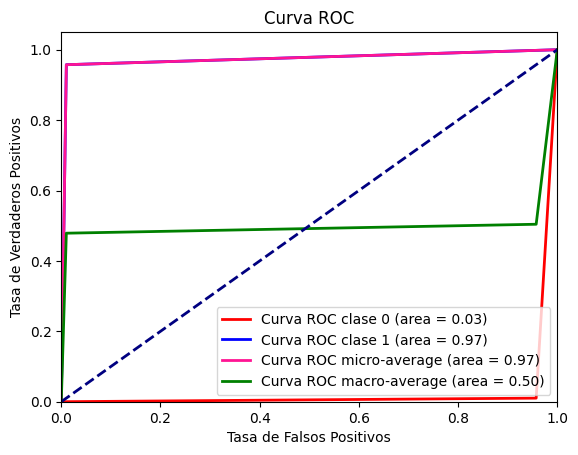

****************************************************************
Evaluación del modelo RandomForestClassifier
****************************************************************
==== Sumario de la clasificación ====
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        98
           1       0.99      0.99      0.99        94

    accuracy                           0.99       192
   macro avg       0.99      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192

Accuracy -> 98.96%



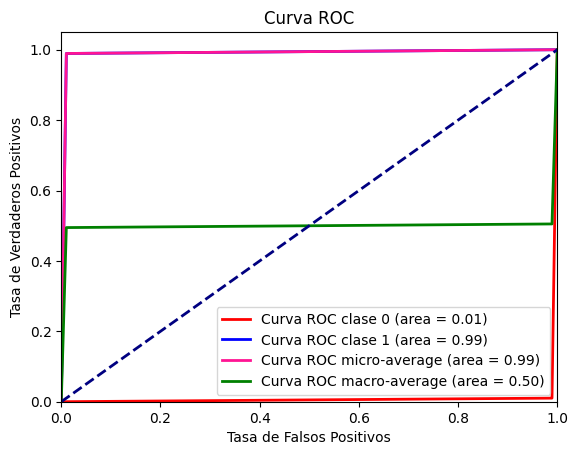

****************************************************************
Evaluación del modelo AdaBoostClassifier
****************************************************************
==== Sumario de la clasificación ====
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        98
           1       0.98      0.97      0.97        94

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

Accuracy -> 97.40%



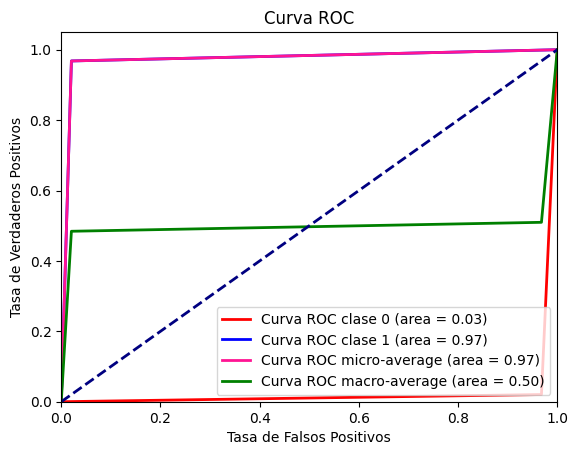

****************************************************************
Evaluación del modelo GradientBoostingClassifier
****************************************************************
==== Sumario de la clasificación ====
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        98
           1       0.99      0.96      0.97        94

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

Accuracy -> 97.40%



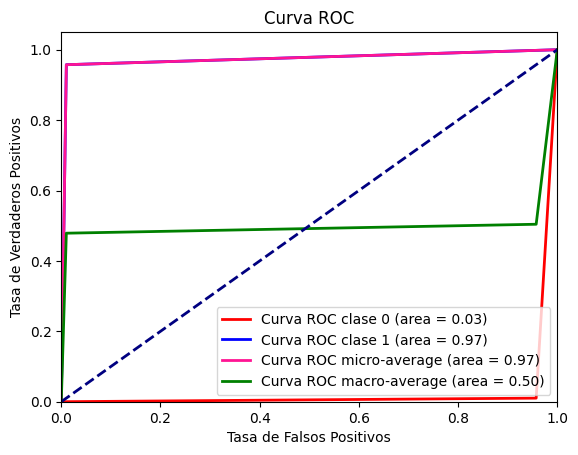

****************************************************************
Evaluación del modelo StackingClassifier
****************************************************************
==== Sumario de la clasificación ====
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        98
           1       0.97      0.97      0.97        94

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

Accuracy -> 96.88%



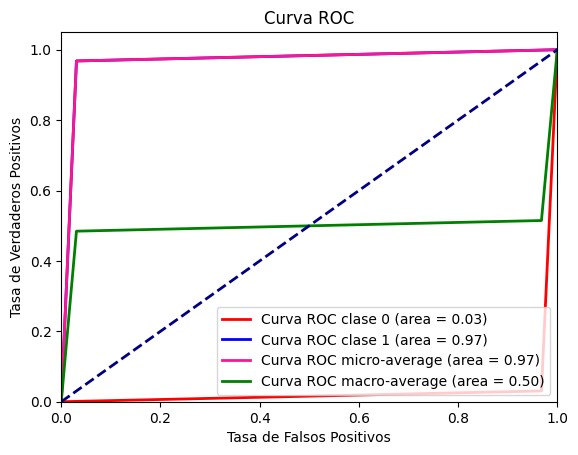

In [ ]:
# Función auxiliar que evalúa los resultados de una clasificación
def evaluate_model(y_test, y_pred):
    """
    Evalúa el modelo e imprime por pantalla las estadísticas
    """
    print('==== Sumario de la clasificación ====')
    print(classification_report(y_test, y_pred))

    print('Accuracy -> {:.2%}\n'.format(accuracy_score(y_test, y_pred)))

    # Ploteamos la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    z = cm[::-1]
    #x = ['Negativo', 'Positivo']  # Cambia los valores según tus clases
    x = [1,0]
    y = x[::-1].copy()
    z_text = [[str(y) for y in x] for x in z]

    fig_cm = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    fig_cm.update_layout(
        height=400, width=400,
        showlegend=True,
        margin={'t': 150, 'l': 0},
        title={'text': 'Matriz de Confusión', 'x': 0.5, 'xanchor': 'center'},
        xaxis={'title_text': 'Valor Real', 'tickangle': 45, 'side': 'top'},
        yaxis={'title_text': 'Valor Predicho', 'tickmode': 'linear'},
    )
    fig_cm.show()

    # Ploteamos la curva ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Curva ROC para la clase 0
    fpr[0], tpr[0], _ = roc_curve(y_test, y_pred, pos_label=0)
    roc_auc[0] = auc(fpr[0], tpr[0])
    plt.plot(fpr[0], tpr[0], color='red', lw=lw, label='Curva ROC clase 0 (area = {:.2f})'.format(roc_auc[0]))

    # Curva ROC para la clase 1
    fpr[1], tpr[1], _ = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.plot(fpr[1], tpr[1], color='blue', lw=lw, label='Curva ROC clase 1 (area = {:.2f})'.format(roc_auc[1]))

    # Curva ROC micro-average
    fpr['micro'], tpr['micro'], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])
    plt.plot(fpr['micro'], tpr['micro'], color='deeppink', lw=lw,
             label='Curva ROC micro-average (area = {:.2f})'.format(roc_auc['micro']))

    # Curva ROC macro-average
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(2):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= 2
    fpr['macro'] = all_fpr
    tpr['macro'] = mean_tpr
    roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])
    plt.plot(fpr['macro'], tpr['macro'], color='green', lw=lw,
             label='Curva ROC macro-average (area = {:.2f})'.format(roc_auc['macro']))

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()


lw = 2

for estimator in estimators:
    print('****************************************************************')
    print('Evaluación del modelo', estimator[0])
    print('****************************************************************')
    y_pred = estimator[1].predict(x_test)
    evaluate_model(y_test, y_pred)


****************************************************************
Evaluación del modelo  BaggingClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        98
           1       0.99      0.96      0.97        94

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

Accuracy -> 97.40%



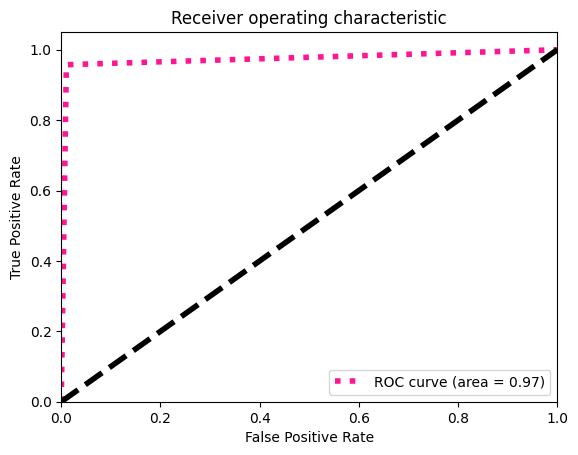

****************************************************************
Evaluación del modelo  RandomForestClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        98
           1       0.99      0.99      0.99        94

    accuracy                           0.99       192
   macro avg       0.99      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192

Accuracy -> 98.96%



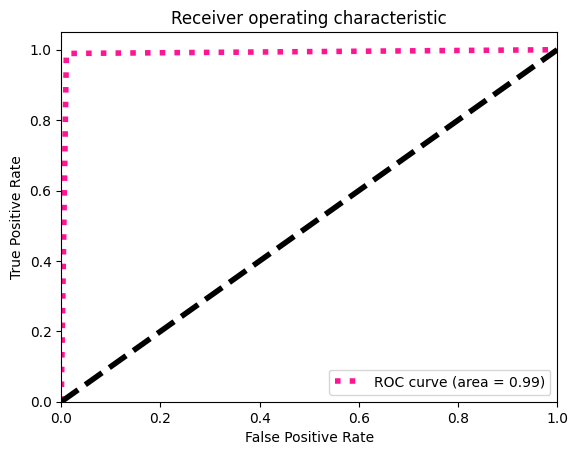

****************************************************************
Evaluación del modelo  AdaBoostClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        98
           1       0.98      0.97      0.97        94

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

Accuracy -> 97.40%



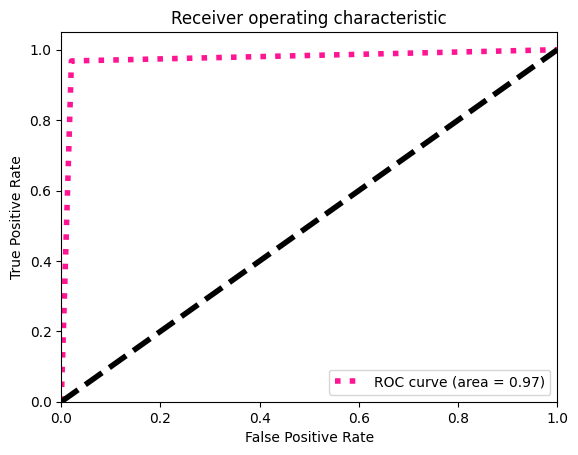

****************************************************************
Evaluación del modelo  GradientBoostingClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        98
           1       0.99      0.96      0.97        94

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

Accuracy -> 97.40%



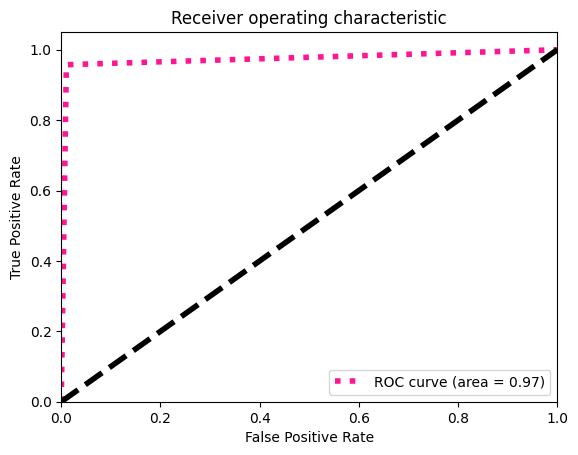

****************************************************************
Evaluación del modelo  StackingClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        98
           1       0.97      0.97      0.97        94

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

Accuracy -> 96.88%



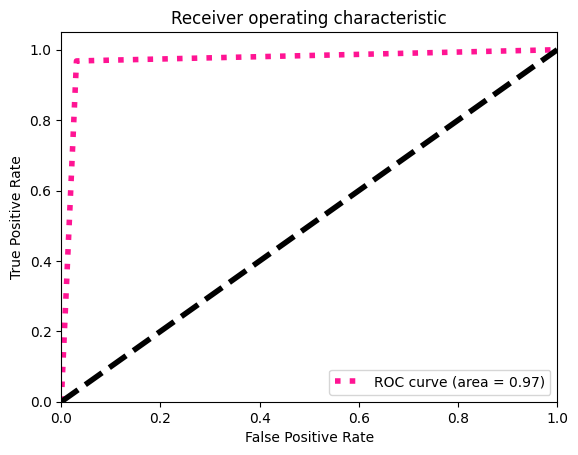

In [ ]:
def evaluate_model_2_classes(y_test, y_pred):
    """
    Evalúa el modelo e imprime por pantalla las estadísticas para una clasificación de 2 clases
    """
    print('==== Sumario de la clasificación ==== ')
    print(classification_report(y_test, y_pred))

    print('Accuracy -> {:.2%}\n'.format(accuracy_score(y_test, y_pred)))

    # Ploteamos la matriz de confusión
    display_labels = sorted(unique_labels(y_test, y_pred), reverse=True)
    cm = confusion_matrix(y_test, y_pred, labels=display_labels)

    z = cm[::-1]
    x = display_labels
    y =  x[::-1].copy()
    z_text = [[str(y) for y in x] for x in z]

    fig_cm = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    fig_cm.update_layout(
        height=400, width=400,
        showlegend=True,
        margin={'t':150, 'l':0},
        title={'text' : 'Matriz de Confusión', 'x':0.5, 'xanchor': 'center'},
        xaxis = {'title_text':'Valor Real', 'tickangle':45, 'side':'top'},
        yaxis = {'title_text':'Valor Predicho', 'tickmode':'linear'},
    )
    fig_cm.show()

    # Ploteamos la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(
        fpr,
        tpr,
        label="ROC curve (area = {0:0.2f})".format(roc_auc),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot([0, 1], [0, 1], "k--", lw=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

lw = 2
n_classes = len(np.unique(y_test))

for estimator in estimators:
    print('****************************************************************')
    print('Evaluación del modelo ', estimator[0])
    print('****************************************************************')
    y_pred = estimator[1].predict(x_test)

    evaluate_model_2_classes(y_test, y_pred)

Se procede a evaluar los modelos con los mejores hiperpárametros encontrados.

****************************************************************
Evaluación del modelo BaggingClassifier
****************************************************************
==== Sumario de la clasificación ====
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        98
           1       0.99      0.96      0.97        94

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

Accuracy -> 97.40%



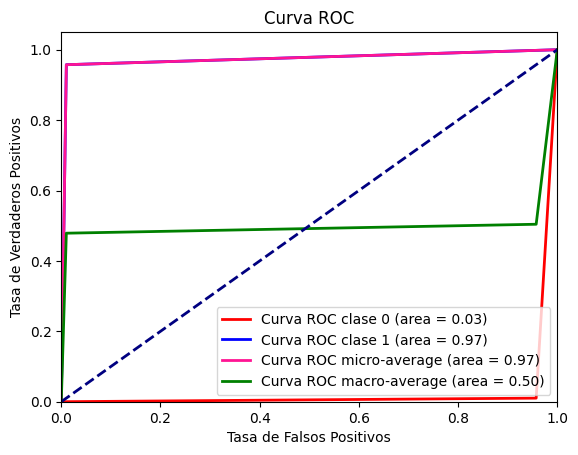

****************************************************************
Evaluación del modelo RandomForestClassifier
****************************************************************
==== Sumario de la clasificación ====
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        98
           1       0.99      0.99      0.99        94

    accuracy                           0.99       192
   macro avg       0.99      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192

Accuracy -> 98.96%



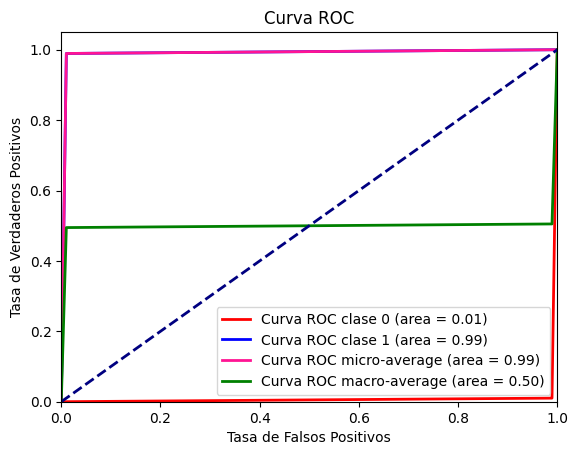

****************************************************************
Evaluación del modelo AdaBoostClassifier
****************************************************************
==== Sumario de la clasificación ====
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        98
           1       0.98      0.97      0.97        94

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

Accuracy -> 97.40%



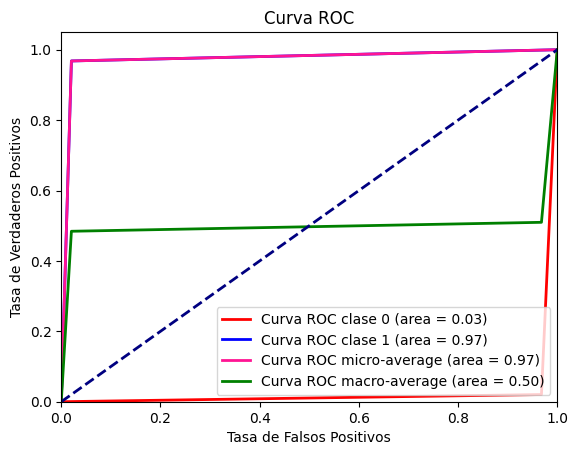

****************************************************************
Evaluación del modelo GradientBoostingClassifier
****************************************************************
==== Sumario de la clasificación ====
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        98
           1       0.99      0.96      0.97        94

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

Accuracy -> 97.40%



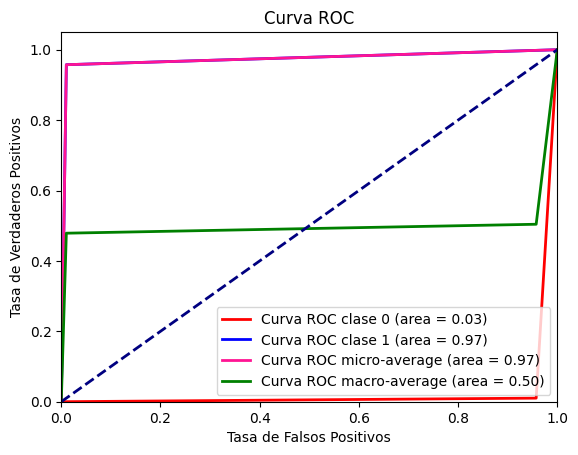

****************************************************************
Evaluación del modelo StackingClassifier
****************************************************************
==== Sumario de la clasificación ====
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        98
           1       0.97      0.97      0.97        94

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

Accuracy -> 96.88%



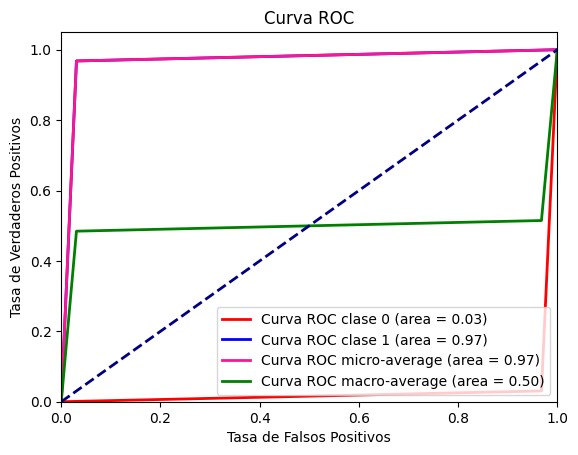

In [ ]:
lw = 2
n_classes = len(np.unique(y_test))


for estimator in estimators:
    print('****************************************************************')
    print('Evaluación del modelo', estimator[0])
    print('****************************************************************')

    best_params = estimator[1].best_params_  # Obtener los mejores hiperparámetros

    # Crear un nuevo estimador con los mejores hiperparámetros
    best_estimator = estimator[1].best_estimator_

    # Ajustar el modelo con los mejores hiperparámetros al conjunto de entrenamiento
    best_estimator.fit(x_train, y_train)

    # Predecir las etiquetas del conjunto de prueba
    y_pred = best_estimator.predict(x_test)

    # Evaluar el modelo utilizando la función evaluate_model
    evaluate_model(y_test, y_pred)
